# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

- The link where the data was downloaded is: http://insideairbnb.com/get-the-data/. 
- This dataset is specifically the listings in NYC. 
- The data columns can be explained when clicking on this link https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?usp=sharing. 
- Data used in this project was scraped on December 15, 2022.

# Loading and Preparing Datasets

In [3]:
# Kept the original dataset
listingsNYC = pd.read_csv('listings.csv', dtype=object)

# Dropping all of the columns which we will not use
listingsNYC= listingsNYC.drop(['last_review','license','latitude','longitude','host_name'], axis=1)

# Dropping all rows with any 'Nan' values in them
listingsNYC.dropna(axis=0, how='any', inplace=True)
data_types_dict = {
    'price':'int64', 
    'minimum_nights':'int64', 
    'host_id':str,
    'number_of_reviews':'int64',
    'reviews_per_month':float,
    'calculated_host_listings_count':'int64',
    'availability_365':'int64',
    'number_of_reviews_ltm':'int64'}

#changing all the datatype to their respective types that we can work with
listingsNYC = listingsNYC.astype(data_types_dict)

# creating a price per stay (ppn) column with the price and minimim nights columns and rounding to 2 decimal places. 
# This is a float dtype 
listingsNYC['pps'] = (listingsNYC['price'] * listingsNYC['minimum_nights']).round(2)
listingsNYC['neighbourhood'].unique().shape[0]
listingsNYC

,id,name,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,pps
0,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Brooklyn,Sunset Park,Entire home/apt,275,21,3,0.03,1,267,1,5775
1,5203,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,Private room,75,2,118,0.73,1,0,0,150
2,5121,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,Private room,60,30,50,0.30,2,322,0,1800
3,5178,Large Furnished Room Near B'way,8967,Manhattan,Midtown,Private room,68,2,559,3.38,1,79,50,136
4,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,Entire home/apt,175,30,49,0.31,3,365,1,5250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41139,769580756557673403,Cozy 1 bedroom with 2 full beds ROOM #2,162927656,Queens,Jamaica,Shared room,99,1,1,1.00,7,174,1,99
41160,769612968972941927,Comfortable 1 bedroom ROOM #3,162927656,Queens,Jamaica,Shared room,91,1,1,1.00,7,174,1,91
41175,770593748958588679,Luxury Brooklyn apt. | 10 mins away from JFK,489532090,Brooklyn,East New York,Entire home/apt,145,1,2,2.00,1,351,2,145
41218,769850569510129629,Private Bed Manhattan 20 Mins,324722741,Queens,Woodside,Private room,50,1,1,1.00,1,240,1,50


### Removing Outliers

In [4]:
# check for outliers 
describe_df = listingsNYC.describe()
describe_df

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,pps
count,32134.000000,32134.000000,32134.000000,32134.000000,32134.000000,32134.000000,32134.000000,3.213400e+04
mean,196.275223,16.139354,33.867866,1.279502,10.636958,142.513506,10.318883,2.685699e+03
std,831.541622,28.483042,61.803678,1.935213,38.325794,141.416457,20.526149,1.573199e+04
min,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,0.000000e+00
25%,80.000000,2.000000,3.000000,0.140000,1.000000,0.000000,0.000000,2.980000e+02
50%,130.000000,5.000000,10.000000,0.580000,1.000000,89.000000,2.000000,1.028000e+03
75%,208.000000,30.000000,36.000000,1.880000,3.000000,306.000000,13.000000,3.000000e+03
max,98159.000000,1250.000000,1666.000000,102.980000,487.000000,365.000000,992.000000,2.253600e+06


### Dropping rows with a price or pps of 0

In [5]:
listingsNYC = listingsNYC[(listingsNYC['price'] != 0)]
listingsNYC.loc[:,'log_price']=np.log(listingsNYC['price'])
listingsNYC

C:\Users\Roger\AppData\Local\Temp\ipykernel_8484\2536111161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listingsNYC.loc[:,'log_price']=np.log(listingsNYC['price'])


,id,name,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,pps,log_price
0,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Brooklyn,Sunset Park,Entire home/apt,275,21,3,0.03,1,267,1,5775,5.616771
1,5203,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,Private room,75,2,118,0.73,1,0,0,150,4.317488
2,5121,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,Private room,60,30,50,0.30,2,322,0,1800,4.094345
3,5178,Large Furnished Room Near B'way,8967,Manhattan,Midtown,Private room,68,2,559,3.38,1,79,50,136,4.219508
4,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,Entire home/apt,175,30,49,0.31,3,365,1,5250,5.164786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41139,769580756557673403,Cozy 1 bedroom with 2 full beds ROOM #2,162927656,Queens,Jamaica,Shared room,99,1,1,1.00,7,174,1,99,4.595120
41160,769612968972941927,Comfortable 1 bedroom ROOM #3,162927656,Queens,Jamaica,Shared room,91,1,1,1.00,7,174,1,91,4.510860
41175,770593748958588679,Luxury Brooklyn apt. | 10 mins away from JFK,489532090,Brooklyn,East New York,Entire home/apt,145,1,2,2.00,1,351,2,145,4.976734
41218,769850569510129629,Private Bed Manhattan 20 Mins,324722741,Queens,Woodside,Private room,50,1,1,1.00,1,240,1,50,3.912023


# Visualizations

Text(0.5, 1.0, 'Histogram of Price')

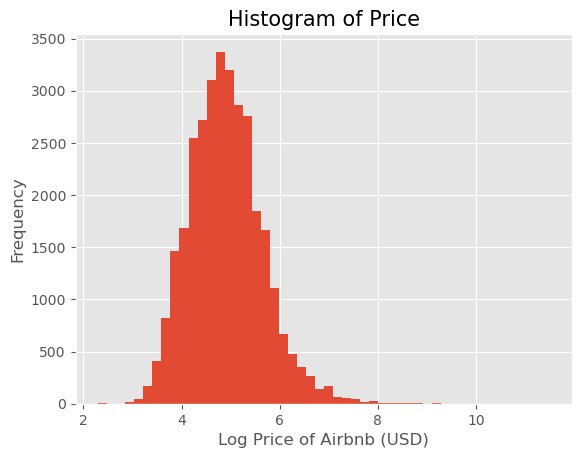

In [6]:
plt.hist(np.log(listingsNYC['price']), bins = 50)
plt.xlabel('Log Price of Airbnb (USD)')
plt.ylabel('Frequency')
plt.title('Histogram of Price', fontsize = 15)

<AxesSubplot:xlabel='log_price', ylabel='Density'>

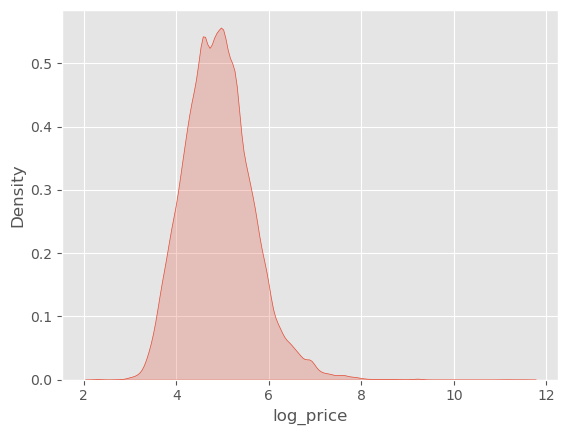

In [7]:
sns.kdeplot(listingsNYC['log_price'], fill = True, label = 'Estimated PDF of Log Price')

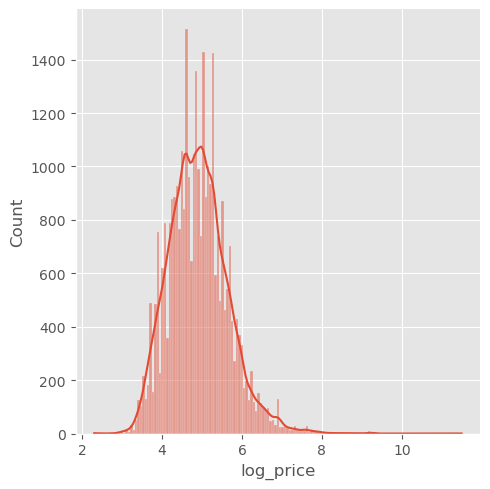

In [8]:
sns.displot((listingsNYC['log_price']), kde=True)

Text(0.5, 1.0, 'Histogram of Price per Night')

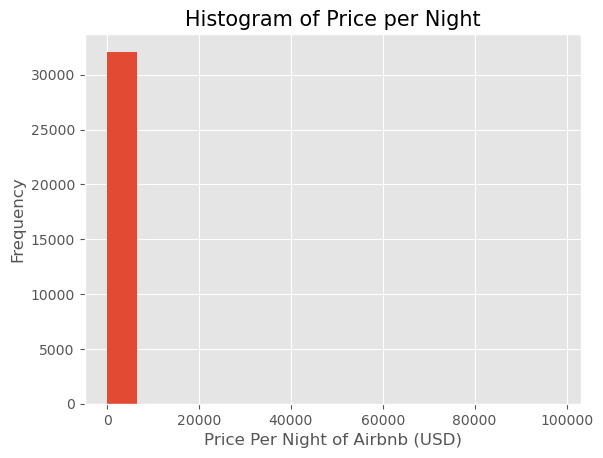

In [9]:
plt.hist((listingsNYC['price']), bins = 15)
plt.xlabel('Price Per Night of Airbnb (USD)')
plt.ylabel('Frequency')
plt.title('Histogram of Price per Night', fontsize = 15)

Text(0.5, 1.0, 'Histogram of Price per Night (pps)')

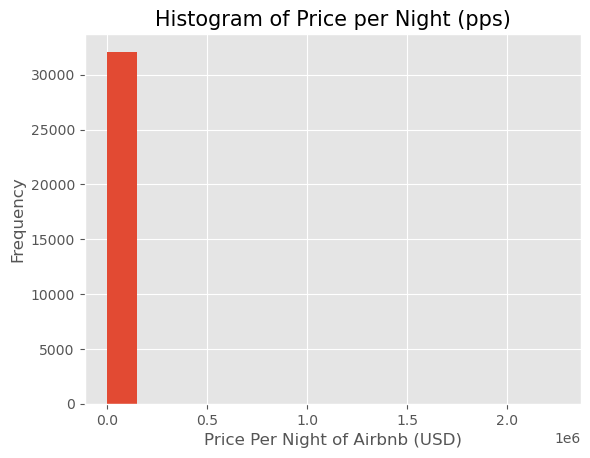

In [44]:
plt.hist((listingsNYC['pps']), bins = 15)
plt.xlabel('Price Per Night of Airbnb (USD)')
plt.ylabel('Frequency')
plt.title('Histogram of Price per Night (pps)', fontsize = 15)

In [48]:
scatter_df = listingsNYC[['minimum_nights','price']]
scatter_df = scatter_df.loc[scatter_df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis = 1)]

Text(0.5, 1.0, 'Scatterplot of Minimum Nights and Price')

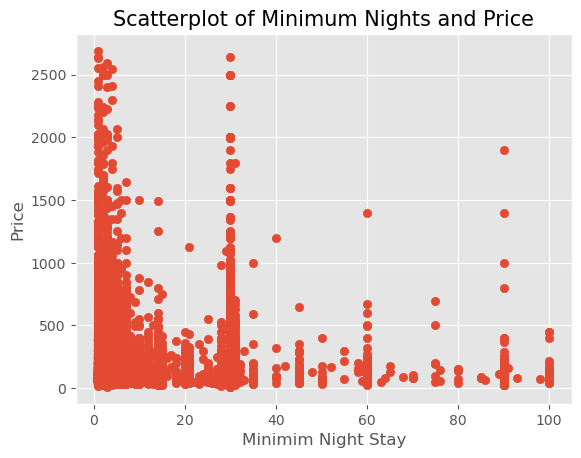

In [49]:
plt.scatter(scatter_df['minimum_nights'], scatter_df['price'] )
plt.xlabel('Minimim Night Stay')
plt.ylabel('Price')
plt.title('Scatterplot of Minimum Nights and Price', fontsize = 15)

In [50]:
outliers = listingsNYC[['minimum_nights','price']]
outliers = outliers.loc[~outliers.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis = 1)]
outliers

,minimum_nights,price
24,200,110
27,365,130
41,120,139
64,330,110
258,365,195
...,...,...
34882,4,2757
34939,1,3600
35163,1,3054
35880,180,70


In [52]:
avg_prices_by_neighborhood

NameError: name 'avg_prices_by_neighborhood' is not defined

In [51]:
plt.bar(avg_prices_by_neighborhood['neighbourhood_group'], avg_prices_by_neighborhood['price'])
plt.xlabel('Boroughs')
plt.ylabel('Price')
plt.title('Barplot of Average Price of each Borough', fontsize = 15)

NameError: name 'avg_prices_by_neighborhood' is not defined

In [29]:
plt.bar(avg_prices_by_neighborhood['neighbourhood_group'], avg_prices_by_neighborhood['price'].count_values())
plt.xlabel('Boroughs')
plt.ylabel('Count')
plt.title('Barplot of Average Price of each Borough', fontsize = 15)

NameError: name 'avg_prices_by_neighborhood' is not defined

Text(0.5, 1.0, 'Barplot of Average Price for each Room Type')

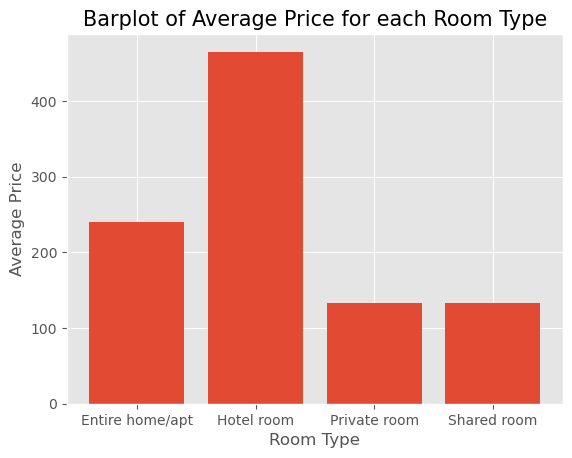

In [71]:
plt.bar(grouped_by_neighborhood['price'], grouped_by_neighborhood['price'])
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.title('Barplot of Average Price for each Room Type', fontsize = 15)

In [21]:
def get_outlier_bounds(col_name):
    '''
    Gets the bound for outliers in the dataset. This is to make the visualizations easier. This function is 
    specifically for this usage and dataset
     
    Param:
        col_name: the name of the column for which you want the bounds. Must be a numerical column
    Return:
        A tuple with the col_name, upper_bound and lower_bound
    '''
    iqr = describe_df.loc['75%',col_name] - describe_df.loc['25%',col_name]
    upper_bound = describe_df.loc['75%',col_name] + (1.5* iqr)
    lower_bound = describe_df.loc['25%',col_name] - (1.5*iqr)
    print(col_name)
    print('upper bound ' + upper_bound.astype(str))
    print('lower bound ' + lower_bound.astype(str))
    print('-'*50)
    return (col_name,upper_bound,lower_bound)

In [22]:
# filtering out the outliers
# We only want the numeric columns because the get_outlier_bounds won't work on strings
numeric_cols = listingsNYC.select_dtypes(include=np.number)
for column in numeric_cols.columns:
    listingsNYC = listingsNYC[(listingsNYC[column] < get_outlier_bounds(column)[1]) & (listingsNYC[column] > get_outlier_bounds(column)[2])]
listingsNYC

,id,name,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,ppn
0,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Brooklyn,Sunset Park,Entire home/apt,275,21,3,0.03,1,267,1,13.10
2,5121,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,Private room,60,30,50,0.30,2,322,0,2.00
4,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,Entire home/apt,175,30,49,0.31,3,365,1,5.83
5,6872,Uptown Sanctuary w/ Private Bath (Month to Month),16104,Manhattan,East Harlem,Private room,65,30,1,0.16,2,300,1,2.17
11,7801,Sweet and Spacious Brooklyn Loft,21207,Brooklyn,Williamsburg,Entire home/apt,395,30,9,0.06,1,332,0,13.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41036,768899741442488288,this is studio apartment,488754388,Queens,Glendale,Entire home/apt,106,1,1,1.00,1,346,1,106.00
41056,768239303625460600,Apartment in Corona Queens,105692628,Queens,Jackson Heights,Entire home/apt,140,1,1,1.00,1,350,1,140.00
41066,769046532467871799,Entire 3 bedroom apt - Sunnyside,188096291,Queens,Sunnyside,Entire home/apt,130,1,1,1.00,1,355,1,130.00
41175,770593748958588679,Luxury Brooklyn apt. | 10 mins away from JFK,489532090,Brooklyn,East New York,Entire home/apt,145,1,2,2.00,1,351,2,145.00
